# Project - Simulation and Monte Carlo methods - Stratification

### Marina BLAZEVIC, Mehdi EL KACEMY, Samy KOBBITE

### Import the necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import qmc
import itertools
import scipy.stats as stats
import time
import random

### Definition of the function f(.)

In [2]:
def f(u):
    d = len(u[0])
    return 1 + np.sin(2*np.pi*(np.sum(u, axis=1)/d - 0.5))


# First part : MC and QMC Estimates 



## 1) Estimation using Monte Carlo Method 

In [3]:
def monte_carlo_integration(d,Ns):
    samples = np.random.uniform(0, 1, size=(Ns,d))
    values = f(samples)
    return np.mean(values)


d = 3
Ns = 100000
result = monte_carlo_integration(d, Ns)
print("The estimated value of the integral for d={} is {:.6f}".format(d, result))

The estimated value of the integral for d=3 is 1.001881


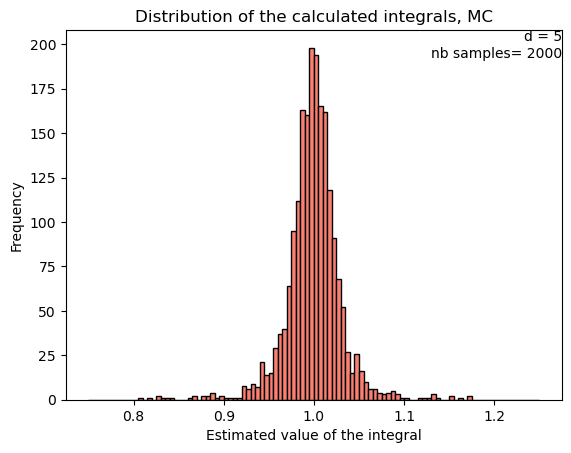

In [4]:
d = 5  # dimension of the integration space
Ns = 2000
plt_vals = []

for i in range(Ns):
    result = monte_carlo_integration(d, i+1)
    plt_vals.append(result)

plt.title("Distribution of the calculated integrals, MC")
plt.hist (plt_vals, color = 'salmon', ec="black", bins=100, range=(0.75,1.25)) 
plt.xlabel("Estimated value of the integral")
plt.ylabel("Frequency")
plt.text(1.0, 1.0, f'd = {d}\nnb samples= {Ns}', ha='right', va='top', transform=plt.gca().transAxes)
plt.show()

## 2) Estimation by Quasi Monte Carlo method

Here we try 2 methods to generate quasi-random numbers, using Sobol and Halton generating methods.

### 2.1) QMC & Sobol

In [5]:
def quasi_monte_carlo1(d, Ns):
    samples = stats.qmc.Sobol(d).random(Ns)
    values = f(samples)
    return np.mean(values)

d = 5
Ns = 2000
result1 = quasi_monte_carlo1(d, Ns)
print("The estimated value of the integral for d={} is {:.6f}".format(d, result1))

The estimated value of the integral for d=5 is 1.000036


c:\Users\blaze\anaconda3\lib\site-packages\scipy\stats\_qmc.py:763: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  sample = self._random(n, workers=workers)


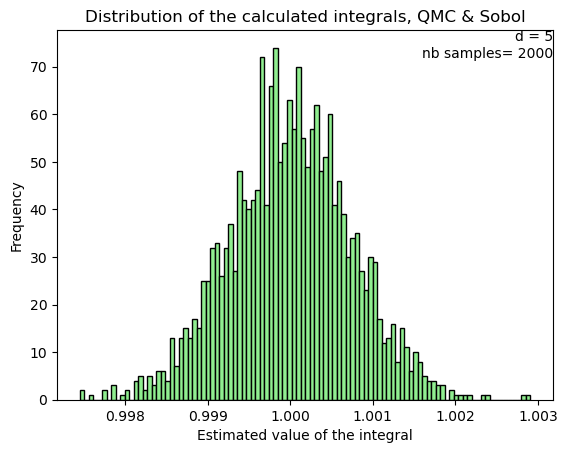

In [6]:
#we stock all the values to plot
plt_vals = []

for i in range(Ns):
    result = quasi_monte_carlo1(d, Ns=1000)
    plt_vals.append(result)


plt.hist (plt_vals, bins=100, color='lightgreen', edgecolor='black') 
plt.title("Distribution of the calculated integrals, QMC & Sobol")
plt.xlabel("Estimated value of the integral")
plt.ylabel("Frequency")
plt.text(1.0, 1.0, f'd = {d}\nnb samples= {Ns}', ha='right', va='top', transform=plt.gca().transAxes)
plt.show() 

### 2.2) Comparison between the 2 methods (MC, QMC Sobol)

#### 2.2.1) Mean Squared Error

In [7]:
def MSE(d,nb_ech,nb_estimation):
    somme_MC=0
    somme_QMC=0
    for i in range(nb_estimation):
        err_QMC=(1- quasi_monte_carlo1(d,nb_ech))**2
        somme_QMC+=err_QMC
    MSE_QMC=somme_QMC/nb_estimation
    for i in range(nb_estimation):
        err_MC=(1- monte_carlo_integration(d,nb_ech))**2
        somme_MC+=err_MC
    MSE_MC=somme_MC/nb_estimation
    return "MSE_MC = "+str(MSE_MC)+" et MSE_QMC = "+str(MSE_QMC)
MSE(5,2000,1000)

'MSE_MC = 0.0001914532379526195 et MSE_QMC = 1.6631276198950725e-07'

For d = 1, nb_samples= 10000, nb_estimations = 1000: \
'MSE_MC = 5.1693700623336035e-05 et MSE_QMC = 8.652818054142973e-33' \

For d = 2, nb_samples = 10000, nb_estimations = 1000: \
'MSE_MC = 5.129406317276329e-05 et MSE_QMC = 2.2707414078034938e-08' \

For d = 3, nb_samples = 10000, nb_estimations = 1000: \
'MSE_MC = 4.871579701648471e-05 et MSE_QMC = 2.6646164250900025e-08' \

For d = 4, nb_samples = 10000, nb_estimations = 1000: \
'MSE_MC = 4.212261652583748e-05 et MSE_QMC = 2.5143801021226344e-08' 


#### 2.2.2) Confidence intervals

In [8]:
def CI(d,nb_estimation):
    MC=f(np.random.uniform(0, 1, size=(nb_estimation,d)))
    halton_seq = qmc.Halton(d)
    samples = halton_seq.random(nb_estimation)
    QMC=f(samples)
    MC_est=monte_carlo_integration(d,nb_estimation)
    QMC_est=quasi_monte_carlo1(d,nb_estimation)
    MC_se=np.std(MC)/np.sqrt(nb_estimation)
    QMC_se=np.std(QMC)/np.sqrt(nb_estimation)
    MC_CI = stats.norm.interval(0.95, loc=MC_est, scale=MC_se)
    QMC_CI = stats.norm.interval(0.95, loc=QMC_est, scale=QMC_se)
    return "For d= "+str(d)+" et nb estimations = "+str(nb_estimation)+", CI_MC = "+str(MC_CI)+" et CI_QMC = "+str(QMC_CI)
CI(5,1000)
    

'For d= 5 et nb estimations = 1000, CI_MC = (0.9724988846064112, 1.0495974507692205) et CI_QMC = (0.9616403497319311, 1.0372795405885895)'

### 2.3) QMC & Halton 



In [9]:
def quasi_monte_carlo2(d, Ns):
    samples = stats.qmc.Halton(d).random(Ns)
    values = f(samples)
    return np.mean(values)

d = 5
Ns = 2000
result2 = quasi_monte_carlo2(d, Ns)
print("The estimated value of the integral for d={} is {:.6f}".format(d, result2))

The estimated value of the integral for d=5 is 1.000920


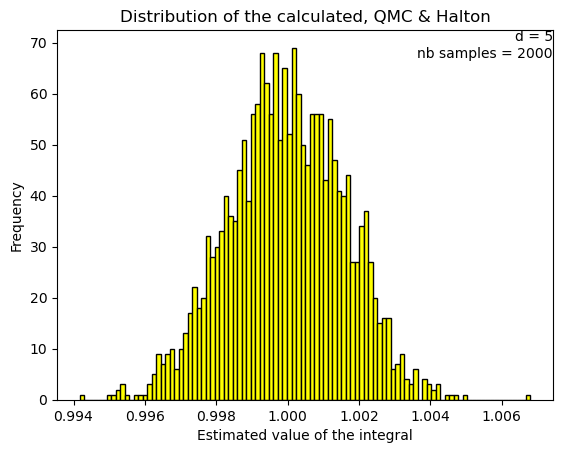

In [10]:
plt_vals = []

for i in range(Ns):
    result = quasi_monte_carlo2(d, Ns=1000)
    plt_vals.append(result)

plt.hist (plt_vals, bins=100, color='yellow', edgecolor='black') 
plt.title("Distribution of the calculated, QMC & Halton")
plt.xlabel("Estimated value of the integral")
plt.ylabel("Frequency")
plt.text(1.0, 1.0, f'd = {d}\nnb samples = {Ns}', ha='right', va='top', transform=plt.gca().transAxes)
plt.show() # shows the plot 

### 2.4) Comparison between MC et QMC Halton

##### 2.4.1) Mean Squared Error

In [11]:
def MSE(d,nb_ech,nb_estimation):
    somme_MC=0
    somme_QMC=0
    for i in range(nb_estimation):
        err_QMC=(1- quasi_monte_carlo2(d,nb_ech))**2
        somme_QMC+=err_QMC
    MSE_QMC=somme_QMC/nb_estimation
    for i in range(nb_estimation):
        err_MC=(1- monte_carlo_integration(d,nb_ech))**2
        somme_MC+=err_MC
    MSE_MC=somme_MC/nb_estimation
    return "MSE_MC = "+str(MSE_MC)+" et MSE_QMC = "+str(MSE_QMC)
MSE(4,10000,1000)

'MSE_MC = 3.996213870427142e-05 et MSE_QMC = 2.5927110902532895e-08'

#### 2.4.2) Confidence intervals

In [12]:
def CI(d,nb_estimation):
    MC=f(np.random.uniform(0, 1, size=(nb_estimation,d)))
    halton_seq = qmc.Halton(d)
    samples = halton_seq.random(nb_estimation)
    QMC=f(samples)
    MC_est=monte_carlo_integration(d,nb_estimation)
    QMC_est=quasi_monte_carlo2(d,nb_estimation)
    MC_se=np.std(MC)/np.sqrt(nb_estimation)
    QMC_se=np.std(QMC)/np.sqrt(nb_estimation)
    MC_CI = stats.norm.interval(0.95, loc=MC_est, scale=MC_se)
    QMC_CI = stats.norm.interval(0.95, loc=QMC_est, scale=QMC_se)
    return "CI_MC = "+str(MC_CI)+" et CI_QMC = "+str(QMC_CI)
CI(2,10000)
    

'CI_MC = (0.99239259762253, 1.0201293374895477) et CI_QMC = (0.9863236197438866, 1.0140391677103593)'

### 2.5) Comparison between QMC Sobol et QMC Halton

In [13]:
def MSE(d,nb_ech,nb_estimation):
    somme_S=0
    somme_H=0
    for i in range(nb_estimation):
        err_H=(1- quasi_monte_carlo2(d,nb_ech))**2
        somme_H+=err_H
    MSE_H=somme_H/nb_estimation
    for i in range(nb_estimation):
        err_S=(1- quasi_monte_carlo1(d,nb_ech))**2
        somme_S+=err_S
    MSE_S=somme_S/nb_estimation
    return "MSE_S = "+str(MSE_S)+" et MSE_H = "+str(MSE_H)
MSE(5,2000,1000)

'MSE_S = 1.7933029530658383e-07 et MSE_H = 6.924668802369929e-07'

In [14]:
def CI(d,nb_estimation):
    halton_seq = qmc.Halton(d)
    samples = halton_seq.random(nb_estimation)
    QMCH=f(samples)
    sobol_seq = qmc.Sobol(d)
    samples2 = sobol_seq.random(nb_estimation)
    QMCS = f(samples2)
    QMCH_est=quasi_monte_carlo2(d,nb_estimation)
    QMCS_est=quasi_monte_carlo1(d,nb_estimation)
    QMCH_se=np.std(QMCH)/np.sqrt(nb_estimation)
    QMCS_se=np.std(QMCS)/np.sqrt(nb_estimation)
    QMCH_CI = stats.norm.interval(0.95, loc=QMCH_est, scale=QMCH_se)
    QMCS_CI = stats.norm.interval(0.95, loc=QMCS_est, scale=QMCS_se)   
    return "CI_QMCS = "+str(QMCS_CI)+" et CI_QMCH = "+str(QMCH_CI)
CI(2,10000)

'CI_QMCS = (0.9861956210557564, 1.0139094517685259) et CI_QMCH = (0.9860890155756263, 1.0138081316796699)'

### 2.6) Comparison of convergence between MC et QMC

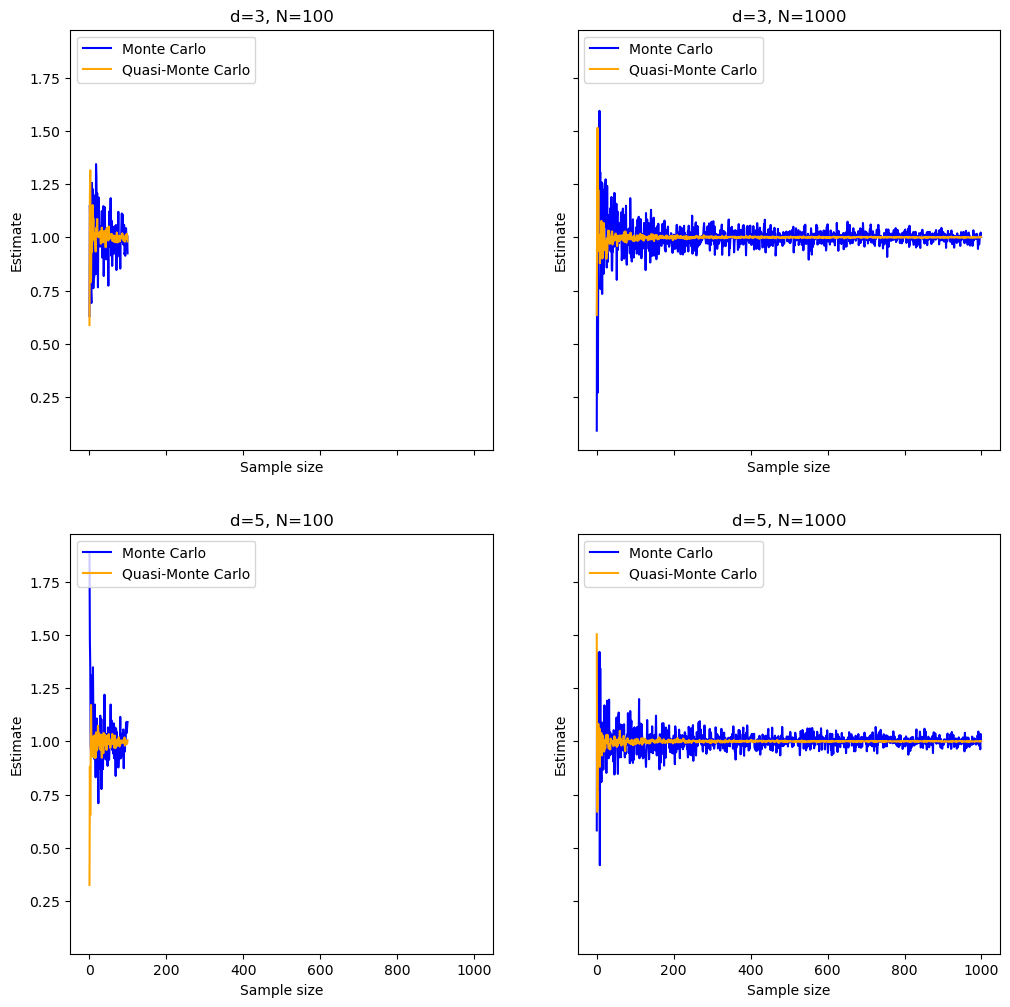

In [15]:
def f(u):
    d = len(u[0])
    return 1 + np.sin(2*np.pi*(np.sum(u,axis=1)/d - 0.5))

def monte_carlo(d, Ns):
    estimates = []
    for N in Ns:
        samples = np.random.uniform(0, 1, size=(N,d))
        values = f(samples)
        estimate = np.mean(values)
        estimates.append(estimate)
    return estimates

def quasi_monte_carlo(d, Ns):
    estimates = []
    for N in Ns:
        samples = stats.qmc.Sobol(d).random(N)
        values = f(samples)
        estimate = np.mean(values)
        estimates.append(estimate)
    return estimates


ds = [3, 5]
Ns = [100, 1000]
methods = [monte_carlo, quasi_monte_carlo]
labels = ["Monte Carlo", "Quasi-Monte Carlo"]
colors = ["blue", "orange"]

fig, axs = plt.subplots(len(ds), len(Ns), figsize=(12, 12), sharex=True, sharey=True)

for i, d in enumerate(ds):
    for j, N in enumerate(Ns):
        for k, method in enumerate(methods):
            estimates = method(d, range(1, N+1))
            axs[i, j].plot(estimates, color=colors[k])
            axs[i, j].set_title("d={}, N={}".format(d, N))
            axs[i, j].set_xlabel("Sample size")
            axs[i, j].set_ylabel("Estimate")
            axs[i, j].legend(labels, loc="upper left")

#plt.tight_layout()
#plt.show()


# Second part : Implementing Haber estimators of order 1 and 2


## 1) Haber estimator of order 1

In [16]:

def f(u):
    d = len(u)
    return 1 + np.sin(2*np.pi*(np.sum(u)/d - 0.5))

In [17]:

def C(k, s):
    C = []  

    for j in itertools.product(range(k), repeat=s):
        Cj = [(2*j[i]+1)/(2*k) for i in range(s)]
        C.append(tuple(Cj))

    return C




In [18]:
s = 3
k = 4

def haber_ordre1(N):
    n = k**s
    estimates = []
    for _ in range(N):
        Uc = [random.uniform(-1/(2*k), 1/(2*k)) for i in range(s)]
        I = 0
        for c in C(k, s):
            I += f(tuple(ci + ui for ci, ui in zip(c, Uc)))
        I /= n
        estimates.append(I)
    return estimates

In [19]:
#C(3, s)

## 2.2) Haber estimator of order 2

Here is the part that just doesn't work ; we implemented Haber estimator of second order but when computing it I just can't figure out why it doesnt work ; at first we had the wrong function so we were able to implement all the others functions you'll see below and we left them in case it would still work. We tried to focus on Haber order 1 but still even had difficulties with that...

In [20]:
#def gc0(u,f) :  
#  g = (f(c+u) + f(c - u)) / 2

def gc(u, c, f):
    g = (f(tuple(ci + ui for ci, ui in zip(c, u))) + f(tuple(ci - ui for ci, ui in zip(c, u)))) / 2
    return g


## This function is not really working, because it was false and i tried correcting it but now it simply just doesn't estimate the right thing and seems to give an integral value of 0...

def haber_ordre2( N):
    n = 2*k**s
    estimates = []
    for _ in range(N):
        Uc = [random.uniform(-1/(2*k), 1/(2*k)) for i in range(s)]
        I = 0
        for c in C(k, s):
            I += gc(Uc, c, f)
        I /= n
        estimates.append(I)
    return estimates


def haber2(Ns):
    n = 2*k**s
    estimates = []
    I = 0
    for _ in range(N):
        for c in C(k, s):
            Uc = [np.random.uniform(-1/(2*k), 1/(2*k)) for i in range(s)]
            I += gc(c, Uc, f)
        I = I / n
        estimates.append(I)
    return estimates

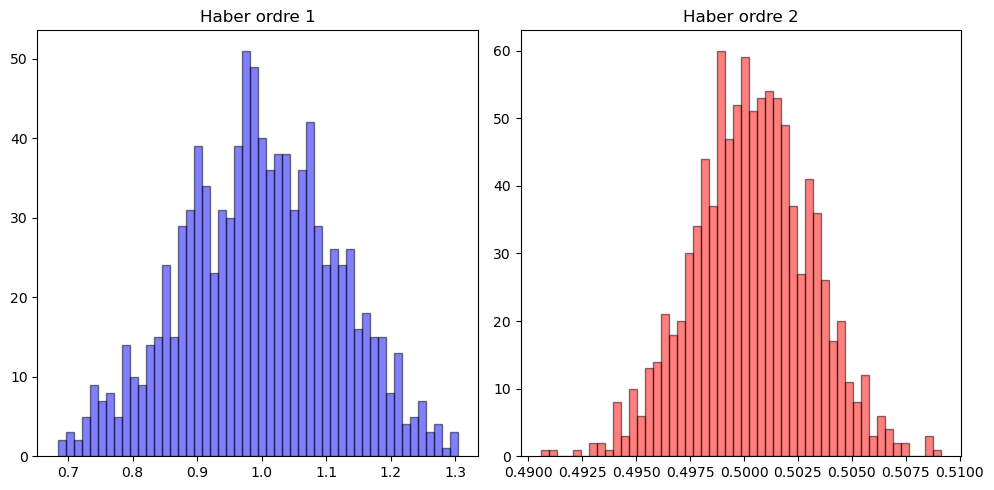

In [21]:

d = 2
s = 4
k = 5
N = 1000

estimates1 = haber_ordre1(N)

estimates2 = haber2( N)

fig, axs = plt.subplots(1,2, figsize=(10, 5))

axs[0].hist(estimates1, bins=50, alpha=0.5, color='blue', edgecolor='black')
axs[0].set_title('Haber ordre 1')


axs[1].hist(estimates2, bins=50, alpha=0.5, color='red', edgecolor='black')
axs[1].set_title('Haber ordre 2')


plt.tight_layout()
plt.show()

### 4) Comparison between all the methods

In [22]:
def monte_carlo_integration(d, num_samples):
    samples = np.random.rand(num_samples, d)
    values = f(samples)
    return np.mean(values)

def quasi_monte_carlo(d, num_samples):
    samples = stats.qmc.Sobol(d).random(num_samples)
    values = f(samples)
    return np.mean(values)


### 4.1) Mean Squared Error

In [23]:
import statistics

In [24]:
k= 2
s= 2
d=2

In [27]:
def MSE2(d,nb_ech,nb_estimation):
    somme_MC=0
    somme_QMC=0
    somme_haber1=0
    somme_haber2=0
    for i in range(nb_estimation):
        err_QMC=(1- quasi_monte_carlo(d,nb_ech))**2
        somme_QMC+=err_QMC
    MSE_QMC=somme_QMC/nb_estimation
    for i in range(nb_estimation):
        err_MC=(1- monte_carlo_integration(d,nb_ech))**2
        somme_MC+=err_MC
    MSE_MC=somme_MC/nb_estimation
    for i in range(nb_estimation):
        err_haber1=(1- statistics.mean(haber_ordre1(nb_ech)))**2
        somme_haber1+=err_haber1
    MSE_haber1=somme_haber1/nb_estimation
    #for i in range(nb_estimation):
        #err_haber2=(1- statistics.mean(haber2(nb_ech)))**2
        #somme_haber2+=err_haber2
    #MSE_haber2=somme_haber2/nb_estimation
    return "MSE_MC = "+str(MSE_MC)+" et MSE_QMC = "+str(MSE_QMC)+" et MSE_haber1 = "+str(MSE_haber1)#"# et MSE_haber2 = "+str(MSE_haber2)
MSE2(2,1000,1000)

'MSE_MC = 0.006768642259600345 et MSE_QMC = 8.696979043032667e-07 et MSE_haber1 = 7.82746578136532e-05'

[0.9456588963618858,
 0.7789785763829252,
 1.0301801954292973,
 0.8750152369803332,
 0.8178032626102607,
 0.8558320726072172,
 0.9640561286633369,
 1.142945736297673,
 1.007927905866835,
 0.9405048634106086,
 0.8418372534804214,
 1.205258997143092,
 0.9797519554345309,
 1.0146330653879172,
 1.1171666206468267,
 1.0014625488898294,
 0.8968963666998825,
 0.9289438490603589,
 1.0933088047318698,
 0.9422681060878869,
 0.8782826890825202,
 1.1054661732805133,
 1.2454132405989407,
 1.2109676905665308,
 1.2872081525586019,
 0.9820055729753123,
 0.9490685613164753,
 1.0270443167969379,
 1.0369780911903692,
 1.1593033003753461,
 0.9723219504750136,
 0.8219336962385234,
 1.1331393204964766,
 0.8361208342892854,
 0.8280747305459436,
 0.9666872718000885,
 1.084552007343122,
 0.9098133390296919,
 0.8346057792093392,
 0.9703907438806549,
 1.134717514712087,
 1.1473616254410504,
 0.8718205668354634,
 1.1110741686908312,
 0.8532557483037267,
 1.0870580746814624,
 1.147178294810433,
 0.8946534621229671

In [ ]:
#MSE2(3,1000,1000)

'MSE_MC = 0.0004709452204028932 et MSE_QMC = 6.934109304682035e-07 et MSE_haber1 = 7.013170294161744e-07 et MSE_haber2 = 6.896343522594065e-07'

In [ ]:
#MSE2(4,1000,1000)

'MSE_MC = 0.00043003938326384206 et MSE_QMC = 5.679832269120855e-07 et MSE_haber1 = 5.81116516556035e-07 et MSE_haber2 = 6.308298885007946e-07'

In [ ]:
#MSE2(5,1000,1000)

'MSE_MC = 0.00035503811097367205 et MSE_QMC = 5.300630204915648e-07 et MSE_haber1 = 5.538802718818352e-07 et MSE_haber2 = 5.347692536150533e-07'

### 4.2) Confidence intervals

In [ ]:

def CI_MC_1(k, s, nb_estimation):
    def f(x):
        return np.exp(-(sum((x[i]-m)**2 for i in range(s)))/s/(2*r**2))

    def monte_carlo_integration_1(s, nb_estimation):
        X = np.random.normal(m, r, size=(nb_estimation, s))
        return np.mean(f(X))

    MC_est = monte_carlo_integration_1(s, nb_estimation)
    MC_se = np.std(f(np.random.normal(m, r, size=(nb_estimation, s)))) / np.sqrt(nb_estimation)
    MC_CI = stats.norm.interval(0.95, loc=MC_est, scale=MC_se)
    return "CI_MC_1 = " + str(MC_CI)



def gc(c, u, f):
    return (f(np.array(c)+np.array(u)) + f(np.array(c)-np.array(u))) / 2

def monte_carlo_integration_2(s, k, nb_estimation, f):
    n = 2*k**s
    I = 0
    for c in C(k, s):
        Uc = [np.random.uniform(-1/(2*k), 1/(2*k)) for i in range(s)]
        I += gc(c, Uc, f)
    I = I / n
    return I

def CI_MC_2(k, s, nb_estimation):
    def f(x):
        return np.exp(-(sum((x[i]-m)**2 for i in range(s)))/s/(2*r**2))

    MC_est = monte_carlo_integration_2(s, k, nb_estimation, f)
    MC_se = np.std([monte_carlo_integration_2(s, k, nb_estimation, f) for _ in range(10)]) / np.sqrt(nb_estimation)
    MC_CI = stats.norm.interval(0.95, loc=MC_est, scale=MC_se)
    return "CI_MC_2 = " + str(MC_CI)

    def CI_MC_2(k, s, nb_estimation):
    def f(x):
        return np.exp(-(sum((x[i]-m)**2 for i in range(s)))/s/(2*r**2))

    MC_est = monte_carlo_integration_2(s, k, nb_estimation, f)
    MC_se = np.std([monte_carlo_integration_2(s, k, nb_estimation, f) for _ in range(10)]) / np.sqrt(nb_estimation)
    MC_CI = stats.norm.interval(0.95, loc=MC_est, scale=MC_se)
    return "CI_MC_2 = " + str(MC_CI)


CI_MC_1(2,5,10000) , CI_MC_2(2,5,10000)

('CI_MC_1 = (0.799285130773405, 0.8036678667799679)',
 'CI_MC_2 = (0.4242133719385901, 0.4242266113701577)')

### 5) Code for speed comparison

In [ ]:
k= 2
s= 2
d= 2
Ns = 10000 #to change

start_time = time.time()
resultat_1 = monte_carlo_integration(d, Ns)
end_time = time.time()
temps_execution_1 = end_time - start_time
print("The algorithm monte_carlo_integration took", temps_execution_1, "seconds.")


start_time = time.time()
resultat_2 = quasi_monte_carlo(d, Ns)
end_time = time.time()
temps_execution_2 = end_time - start_time
print("The algorithm  quasi_monte_carlo took", temps_execution_2, "seconds.")


start_time = time.time()
resultat_3 = haber_ordre1( Ns)
end_time = time.time()
temps_execution_3 = end_time - start_time
print("The algorithm  haber_ordre1 took", temps_execution_3, "seconds.")

start_time = time.time()
resultat_4 = haber2(Ns)
end_time = time.time()
temps_execution_4 = end_time - start_time
print("L'algorithme haber_ordre2_integration a pris", temps_execution_4, "secondes pour s'exécuter.")



The algorithm monte_carlo_integration took 0.0009992122650146484 seconds.
The algorithm  quasi_monte_carlo took 0.0012722015380859375 seconds.
The algorithm  haber_ordre1 took 0.8255105018615723 seconds.


### 6) Boxplots to visualize the numerical error

In [ ]:
d = 4
s  = 2
k = 2
Ns = 5000

n_runs = 100
estimations_1 = [monte_carlo_integration(d, Ns) for _ in range(n_runs)]
estimations_2 = [quasi_monte_carlo(d, Ns) for _ in range(n_runs)]
estimations_3 = [haber_ordre1(Ns) for _ in range(n_runs)]
#estimations_4 = [haber_ordre2_integration(d, Ns) for _ in range(n_runs)]

vraie_valeur = 1
erreurs_1 = [abs(estimation - vraie_valeur) for estimation in estimations_1]
erreurs_2 = [abs(estimation - vraie_valeur) for estimation in estimations_2]
erreurs_3 = [abs(estimation - vraie_valeur) for estimation in estimations_3]
#erreurs_4 = [abs(estimation - vraie_valeur) for estimation in estimations_4]


plt.boxplot([erreurs_1, erreurs_2, erreurs_3])
plt.xticks([1, 2, 3], ['Monte Carlo', 'Quasi-Monte Carlo', 'Haber Ordre 1'])
plt.ylabel('Numerical error')
plt.text(1.0, 1.0, f'd = {d}\nNb executions = {n_runs}\nNb samples = {Ns}', ha='right', va='top', transform=plt.gca().transAxes)
plt.show()
 


TypeError: unsupported operand type(s) for -: 'list' and 'int'

In [ ]:
d 

5

# Third part : Answer to the question using Importance Sampling

In [ ]:
def f(u):
    d = len(u)
    return 1 + np.sin(2*np.pi*((1/d)*np.sum(u) - 1/2))



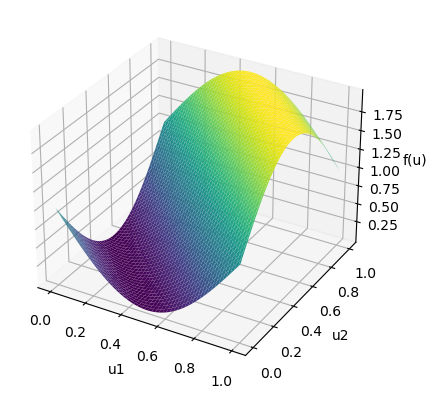

In [36]:
import numpy as np
import matplotlib.pyplot as plt

def f(u):
    d = len(u)
    return 1 + np.sin(2*np.pi*((1/d)*np.sum(u) - 1/2))

# Define the limits of integration
a = 0
b = 1

# Generate a grid of points
n = 100
x = np.linspace(a, b, n)
y = np.linspace(a, b, n)
xx, yy = np.meshgrid(x, y)
points = np.column_stack((xx.ravel(), yy.ravel()))

# Evaluate the function at the grid points
z = np.array([f(point) for point in points])
z = z.reshape(xx.shape)

# Plot the function
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(xx, yy, z, cmap='viridis')
ax.set_xlabel('u1')
ax.set_ylabel('u2')
ax.set_zlabel('f(u)')
plt.show()

We tried gridsearch but it didn't work...

In [67]:
import numpy as np

def f(u):
    d = len(u)
    return 1 + np.sin(2 * np.pi * ((1 / d) * np.sum(u) - 1 / 2))

def g(u, n, value1, value2):
    norm1 = np.sum(np.abs(u))
    if norm1 > 3 * d / 4 or norm1 < d / 4:
        return value1
    else:
        return value2

N = 10000
d = 5
n = 1  # size of the hypercube
samples = np.random.uniform(size=(N, d))

# Initialize the best estimate and corresponding values
best_estimate = float('inf')
best_value1 = 0
best_value2 = 0

# Perform a grid search to find the optimal values
for value1 in np.linspace(0, 1, num=50):
    for value2 in np.linspace(0, 1, num=50):
        weights = []
        for u in samples:
            denominator = g(u, n, value1, value2)
            if denominator != 0:
                weights.append(f(u) / denominator)
        if len(weights) > 0:
            estimate = np.mean(weights)
            if abs(estimate - 1) < abs(best_estimate - 1):
                best_estimate = estimate
                best_value1 = value1
                best_value2 = value2

print("The best estimated value of the integral is", best_estimate)
print("The optimal value1 for function g is", best_value1)
print("The optimal value2 for function g is", best_value2)


The best estimated value of the integral is 1.0045025285020868
The optimal value1 for function g is 0.0
The optimal value2 for function g is 1.0


In [74]:
value1 = 0
value2 = 1

def f(u):
    d = len(u)
    return 1 + np.sin(2*np.pi*((1/d)*np.sum(u) - 1/2))

def g(u, n, value1, value2):
    norm1 = np.sum(np.abs(u))
    if norm1 > 3 * d / 4 or norm1 < d / 4:
        return value1
    else:
        return value2

N = 10000
d = 5 
n = 1  # size of the hypercube
samples = np.random.uniform(size=(N, d))
weights = np.array([f(u) / g(u, n, 0, 2) for u in samples])
estimate = np.mean(weights)

print("The estimated value of the integral is", estimate)  


The estimated value of the integral is inf


C:\Users\blaze\AppData\Local\Temp\ipykernel_58784\763244407.py:19: RuntimeWarning: divide by zero encountered in double_scalars
  weights = np.array([f(u) / g(u, n, 0, 2) for u in samples])


In [ ]:
def imps(d,Ns):
    samples = np.random.uniform(size=(N, d))
    weights = np.array([f(u)/g(u) for u in samples])
    estimate = np.mean(weights)
    return estimate



ValueError: supplied range of [4.3639516367210973e-07, inf] is not finite

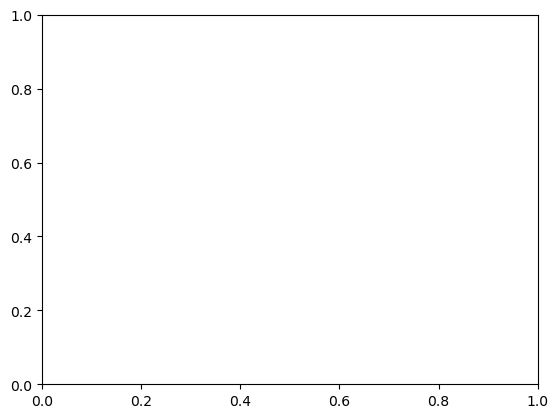

In [75]:
plt.hist(weights, bins=50)
plt.title("Distribution of the weights for Ns=1000000")
plt.xlabel("Weights")
plt.ylabel("Frequency")
plt.show()

In [ ]:


Nsi = 2000 
plt_vals = []

for i in range(Ns):
    # Calculer les poids et l'estimateur de l'intégrale
    N = 2000
    samples = np.random.uniform(size=(N, d))
    weights = np.array([f(u)/g(u) for u in samples])
    estimate = np.mean(weights)
    plt_vals.append(estimate)

# Tracer la distribution des estimateurs
plt.hist(plt_vals, bins=100, color='yellow', edgecolor='black')
plt.title("Distribution of the integral estimators")
plt.xlabel("Estimates")
plt.ylabel("Frequency")
plt.text(1.0, 1.0, f'd = {d}\nnb simulations = {Nsi}', ha='right', va='top', transform=plt.gca().transAxes)
plt.show()


In [ ]:
def MSE(d,nb_ech,nb_estimation):
    somme_MC=0
    somme_IS=0
    for i in range(nb_estimation):
        err_MC=(1- monte_carlo_integration(d,nb_ech))**2
        somme_MC+=err_MC
    MSE_MC=somme_MC/nb_estimation
    for i in range(nb_estimation):
        err_IS=(1- imps(d,nb_ech))**2
        somme_IS+=err_IS
    MSE_IS=somme_IS/nb_estimation
    return "MSE_MC = "+str(MSE_MC)+" et MSE_IS = "+str(MSE_IS)
MSE(5,2000,1000)

'MSE_MC = 0.008322030942203806 et MSE_IS = 0.000358597053170819'

In [ ]:
d= 10
Ns = 10000

start_time = time.time()
resultat_1 = monte_carlo_integration(d, Ns)
end_time = time.time()
temps_execution_1 = end_time - start_time
print("The algorithm monte_carlo_integration took", temps_execution_1, "seconds.")


start_time = time.time()
resultat_2 = imps(d, Ns)
end_time = time.time()
temps_execution_2 = end_time - start_time
print("The algorithm importance sampling took", temps_execution_2, "seconds.")

L'algorithme monte_carlo_integration a pris 0.01849532127380371 secondes pour s'exécuter.
L'algorithme importance sampling a pris 0.05063223838806152 secondes pour s'exécuter.


Problem while adapting ... 

In [ ]:
d = 5
Ns = 1000


#n_runs = 100
#estimations_1 = [monte_carlo_integration(d, Ns) for _ in range(n_runs)]
#estimations_2 = [quasi_monte_carlo(d, Ns) for _ in range(n_runs)]
#estimations_3 = [haber_ordre1_integration(d, Ns) for _ in range(n_runs)]
#estimations_4 = [haber_ordre2_integration(d, Ns) for _ in range(n_runs)]
#estimations_5 = [imps(d, Ns) for _ in range(n_runs)]


vraie_valeur = 1
#erreurs_1 = [abs(estimation - vraie_valeur) for estimation in estimations_1]
#erreurs_2 = [abs(estimation - vraie_valeur) for estimation in estimations_2]
#erreurs_3 = [abs(estimation - vraie_valeur) for estimation in estimations_3]
#erreurs_4 = [abs(estimation - vraie_valeur) for estimation in estimations_4]
#erreurs_5 = [abs(estimation - vraie_valeur) for estimation in estimations_5]
# Créer un boxplot pour chaque algorithme
#plt.boxplot([erreurs_1, erreurs_2, erreurs_3, erreurs_4, erreurs_5])
#plt.xticks([1, 2, 3, 4,5], ['Monte Carlo', 'Quasi-Monte Carlo', 'Haber Ordre 1', 'Haber Ordre 2', 'Importance Sampling'])
#plt.ylabel('Erreur numérique')
#plt.text(1.0, 1.0, f'd = {d}\nNombre executions = {n_runs}\nNombre echantillons = {Ns}', ha='right', va='top', transform=plt.gca().transAxes)
#plt.show()